In [11]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
%matplotlib inline
#% matplotlib notebook
import warnings
warnings.filterwarnings(action='ignore') 
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### 예제 사용을 위한 데이터 생성

#### 분류 데이터

X.shape: (26, 2)


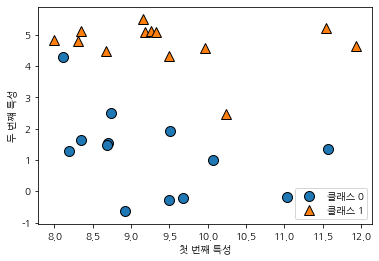

In [12]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번쨰 특성")
print("X.shape:", X.shape)

#### 회귀 데이터 

Text(0, 0.5, '타깃')

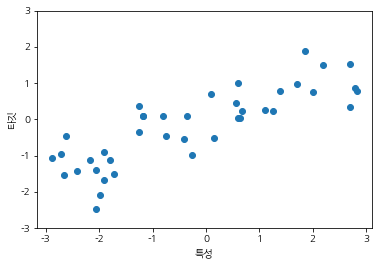

In [13]:
X, y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

#### cancer data

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [17]:
print("유방암 데이터의 형태 : ", cancer.data.shape)
print("클래스별 샘플 개수 : \n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

유방암 데이터의 형태 :  (569, 30)
클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [18]:
print("특성 이름 : \n", cancer.feature_names)

특성 이름 : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 보스턴 주택가격 data

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: ", boston.data.shape)

데이터의 형태:  (506, 13)


특성공학(feature engineering) 
- 범죄율과 고속도로 접근성의 곱도 특성으로 생각한다

In [21]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# k-NN  classification

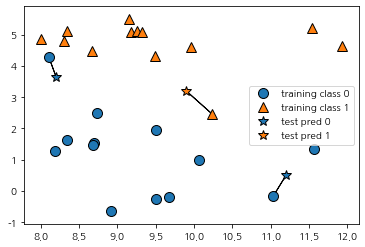

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

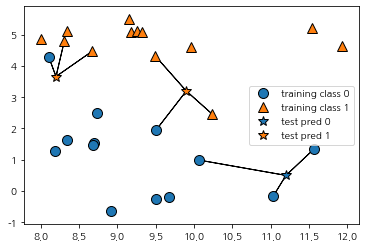

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [25]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [28]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [30]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


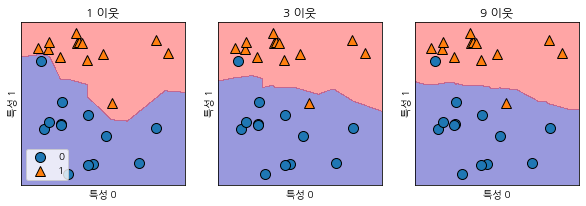

In [31]:
fig, axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit메소드를 한줄에 쓸 수 있습니다. 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax =ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

- 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도가 낮아진다

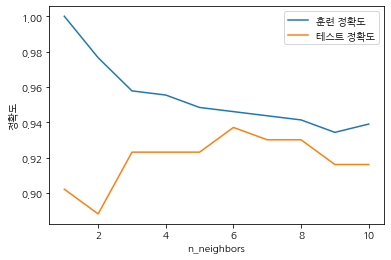

In [35]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy= []
test_accuracy = []
# 1에서 10까지 n_neighbors 를 적용 
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # 훈련세트 정확도 저장 
    training_accuracy.append(clf.score(X_train,y_train))
    # 일반화 정확도 저장 
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

# K-NN regression

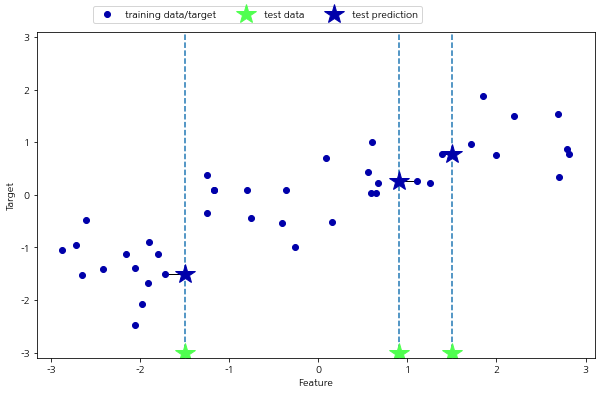

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

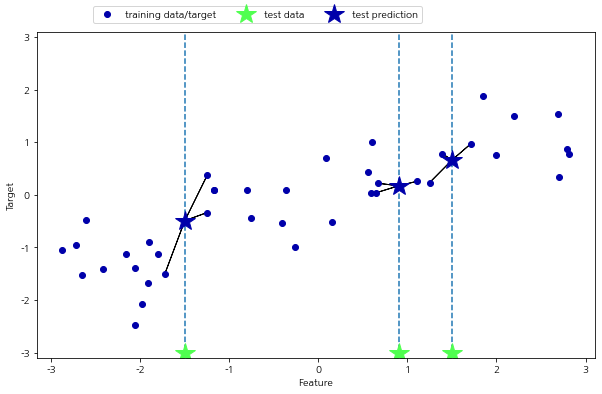

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print("테스트 세트 예측 : \n", reg.predict(X_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


회귀일 떈 결정계수($R^{2}$)로 예측의 적합도를 측정(보통 0~1사이)

$R^{2}=1-\frac{(y-\hat{y})^{2}}{(y-\bar{y})^{2}}$

y: 타깃값 
$\bar{y}$ : 타깃값의 평균 
$\hat{y}$ : 모델의 예측값

In [42]:
fig, axes = plt.subplots(1,3, figsize = (15,4))
# -3과 3 사이에 1000개의 데이터 포인트를 만듭니다

print("테스트 세트 R^2 : {:.2f}" .format(reg.score(X_test,y_test)))

테스트 세트 R^2 : 0.83


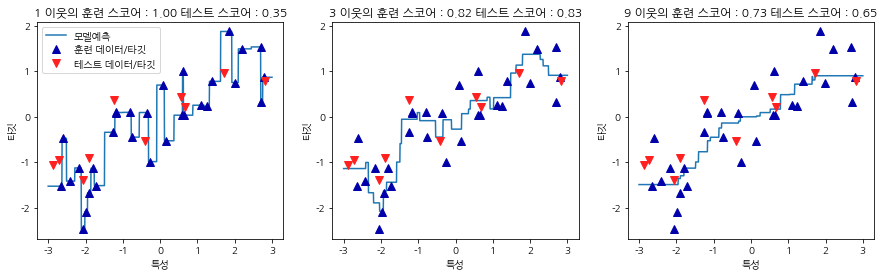

In [43]:
fig, axes = plt.subplots(1,3,figsize = (15,4))
# -3과 3 사이에 1000개의 데이터 포인트를 만듭니다
line =  np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # 1,3,9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1),markersize = 8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(['모델예측', '훈련 데이터/타깃',
               '테스트 데이터/타깃'],loc = 'best')

KNeighbors 분류기에 중요한 매개변수
- 데이터 포인트 사이의 거리를 재는 방법(여기서는 유클라디안 거리 방식 사용)
- 이웃의 수 

장단점 
- 훈련세트가 크면 예측이 느려짐, 많은 특성을 가진 데이터 셋에서 잘 작동하지 않으며, 특성값 대부분이 0인 데이터셋과 특히 잘 작동하지 않음 
- 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않는다.